In [35]:
import time
import matplotlib.pyplot as plt
def timer(func):
    def inner(*args,**kwargs):
        t0 = time.time()
        func(*args,**kwargs)
        t1 = time.time()
        return t1-t0
    return inner

class TimePlotter(object):
    def __init__(self,funcs:list,DataSize=[1000000,10000000,100000000],default = 0.01,scale='log'):
        self.data = []
        self.time = []
        self.DataSize = DataSize
        self.default = default
        self.scale = scale
        for i in DataSize:  
            self.data.append(list(range(i)))
        for f in funcs:
            t = []
            for data in self.data:
                t1 = f(data)
                if t1 == 0:
                    t1 =default
                t.append(t1)
            self.time.append(t)
        #print(self.time)
    def plot(self):
        for t in range(len(self.time)):
            plt.plot(self.DataSize,self.time[t],label='f{}'.format(t+1))
        plt.legend()
        plt.xscale(self.scale)
        plt.yscale(self.scale)

# Python Algorithms
## Chapter 2 The Basics
### Some Core Ideas in Computing
### Asymptotic Notation
Python lists are arrays, not linked lists. 

In [4]:
class node(object): # Linked list
    def __init__(self,value,nextNode=None):
        self.value = value 
        self.next = nextNode
L = node('a',node('b',node('c',node('d'))))
L.next.next.value

'c'

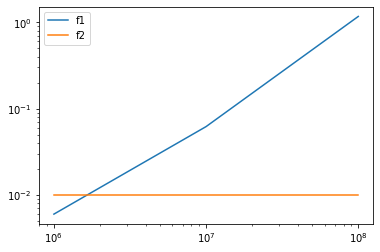

In [28]:
@timer
def f1(nums):  # Constant time
    nums.append(1)
@timer
def f2(nums):  # Linear time O(n)
    nums.insert(0,1)
TimePlotter([f2,f1]).plot()

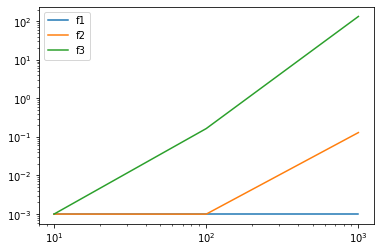

In [38]:
@timer   
def f1(nums):# Linear time O(n)
    s = 0
    for x in nums:
        s += x
@timer 
def f2(nums):# Quadric time O(n^2), calculates the sum of all possible products
    s = 0
    for x in nums:
        for y in nums:
            s += x*y
@timer 
def f3(nums):# Cubic time O(n^3)
    s = 0
    for x in nums:
        for y in nums:
            s += x*y
        for z in nums:
            for w in nums:
                s += x-w
TimePlotter([f1,f2,f3],DataSize=[10,100,1000],default=0.001,scale='log').plot()

#### Three important cases
### Implementing Graphs and Trees
#### Adjacency Lists and the Like
![](../images/python%20algorithm/1.jpg)

In [40]:
a,b,c,d,e,f,g,h = range(8)
N = [
    {b,c,f,e,d}, #a
    {e,c}, #b
    {d}, #c
    {e}, #d
    {f},  #e
    {c,g,h},  #f
    {f,h},  #g
    {f,g}  #h
]
print(b in N[a]) # neighbourhood membership
print(len(N[f])) # degree

True
3


#### Adjacency Matrices

In [42]:
a,b,c,d,e,f,g,h = range(8)
inf = float('inf')
#      a, b,   c,   d,   e,   f,   g,   h
W = [[ 0, 2,   1,   3,   9,   4,   inf, inf], # a
    [inf, 0,   4,   inf, 3,   inf, inf, inf], # b
    [inf, inf, 0,   8,   inf, inf, inf, inf], # c
    [inf, inf, inf, 0,   7,   inf, inf, inf], # d
    [inf, inf, inf, inf, 0,   5,   inf, inf], # e
    [inf, inf, 2,   inf, inf, 0,   2,   2], # f
    [inf, inf, inf, inf, inf, 1,   0,   6], # g
    [inf, inf, inf, inf, inf, 9,   8,   0]] # h

print(W[c][e]) # Neighbourhood membership
print(sum([1 for w in W[a] if w < inf])-1) #degree

inf
5


#### Implementing Trees

In [43]:
class Tree(object): # binary tree
    def __init__(self,left,right):
        self.left=left
        self.right = right
T = Tree(Tree('a','b'),Tree('c','d'))
T.left.right

'b'

In [44]:
class Tree(object):
    def __init__(self,child,next=None):
        self.child = self.val = child
        self.next = next
T = Tree('a',Tree('b',Tree('c',Tree('d'))))
T.next.next.val

'c'

#### A Multitude of Representations
### Beware of Black Boxes
#### Hidden Squares
#### The Trouble with Floats
#### Exercises
1. When constructing a multidimensional array using Python lists, you need to use `for` loops 
(or something equivalent, such as list comprehension). Why would it be problematic to create a 
10×10 array with the expression `[[0]*10]*10`?

In [46]:
a = [[0]*10]*10
a[2][3] = 3
a

[[0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0]]

In [47]:
a = [[0 for i in range(10)] for j in range(10)]
a[2][3] = 3
a

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

2. Assume perhaps a bit unrealistically that allocating a block of memory takes constant time, 
as long as you leave it uninitialized (that is, it contains whatever arbitrary “junk” was left there the last time it was used). You want an array of $n$ integers, and you want to keep track of whether each entry is unitialized or whether it contains a number you put there. This is a check you want to be able to do in constant time for any entry. How would you do this with only constant time for initialization? And how could you use this to initialize an empty adjacency array in constant time, thereby avoiding an 
otherwise obligatory quadratic minimum running time?

In [56]:
import random  
a = [random.randint(0,10) for i in range(10)]
b = [random.randint(0,10) for i in range(10)]
c = [random.randint(0,10) for i in range(10)]
a,b,c  # 3 unititialized arrays

([9, 5, 9, 10, 9, 1, 1, 7, 7, 7],
 [10, 7, 0, 4, 2, 1, 9, 1, 4, 5],
 [3, 7, 2, 10, 1, 3, 3, 1, 1, 5])

In [57]:
init = 100 #init value, it does not matter if it is an integer or an array
i= 6 # initialize 
m = 0 #counter
a[i] = init # initialize
b[i] = m
c[m] = i
m += 1 
a,b,c

([9, 5, 9, 10, 9, 1, 100, 7, 7, 7],
 [10, 7, 0, 4, 2, 1, 0, 1, 4, 5],
 [6, 7, 2, 10, 1, 3, 3, 1, 1, 5])

In [60]:
def check(i,a,b,c):# check if initialized
    if b[i] < m and c[b[i]] == i: 
        return True
    else: 
        return False
check(6,a,b,c),check(1,a,b,c)

(True, False)

3. Show that $O$ and $\Omega$ are inverses of one another; that is, if $f$ is $O(g)$, then $g$ is $\Omega(f)$, and vice versa.  
   $f$ is $O(g)$:  
   for $n \ge n_0,f(n)\le cg(n), c > 0$  
   for $n \ge n_0,g(n)\ge \dfrac{1}{c}f(n)$   
   $\therefore g$ is $\Omega(f)$ 
4. Logarithms can have different bases, but algorists don’t usually care. To see why, consider the equation $\log_b n = \dfrac{\log_a n}{\log_ab}$. First, can you see why this is true? Second, why does this mean that we usually don’t worry about bases?  
    $\log_bn = t,t = b^n$  
    $\dfrac{\log_a n}{\log_ab} = \dfrac{\log_a b^t}{\log_ab} =t$  
5. Show that any increasing exponential ($\Theta(k^n)$ for $k > 1$) asymptotically dominates any polynomial ($\Theta(n^j)$ for $j > 1$)).  
   $\dfrac{n^j}{k^n} = t$  
   $\log_k \dfrac{n^j}{k^n} = \log_kt$  
   $j\log_kn -n = \log_k t$  
   $t = k^{j\log_kn -n}$   
   $j\log_kn -n = j\log_kn - \log_kk^n = j\log_k\dfrac{n}{k^n} < j\log_k1 =0$
   $\dfrac{d}{dn}(n-k^n) =-nk^{n-1} = 0, n = 0$  
   $\dfrac{d}{dn}(-nk^{n-1}) = -n(n-1)k^{n-2} \le0, n \ge1$  
   $\therefore$ for $n \ge 1,(n-k^n)_{\max} =1-k < 0, n < k^n$  
   $\therefore t < k^0 = 1$  
   $\dfrac{n^j}{k^n} < 1, n^j$ is $O(k^n)$

6. Show that any polynomial (that is, Q(nk
), for any constant k > 0) asymptotically dominates any 
logarithm (that is, Q(lg n)). (Note that the polynomials here include, for example, the square root, 
for k = 0.5.)
2-7. Research or conjecture the asymptotic complexity of various operations on Python lists, such as 
indexing, item assignment, reversing, appending, and inserting (the latter two discussed in the “Black 
Box” sidebar on list). How would these be different in a linked list implementation? What about, 
for example, list.extend?
2-8. Show that the expressions Q(f) + Q(g) = Q(f + g) and Q(f) · Q(g) = Q(f · g) are correct. Also, try your 
hand at max(Q(f), Q(g)) = Q(max(f, g)) = Q(f + g).
2-9. In Appendix C, you’ll find a numbered list of statements about trees. Show that they are equivalent.
2-10. Let T be an arbitrary rooted tree with at least three nodes, where each internal node has exactly 
two children. If T has n leaves, how many internal nodes does it have?
2-11. Show that a directed acyclic graph (DAG) can have any underlying structure whatsoever. Put 
differently, any undirected graph can be the underlying graph for a DAG, or, given a graph, you can 
always orient its edges so that the resulting digraph is a DAG.
2-12. Consider the following graph representation: You use a dictionary and let each key be a pair 
(tuple) of two nodes, with the corresponding value set to the edge weight. For example W[u, v] = 42. 
What would be the advantages and disadvantages of this representation? Could you supplement it to 
mitigate the downsides?